Метод опорных векторов (SCM - support vector machine) - классификация и регрессия

Разделяющая классификация

Выбирается линия с максимальным отступом

In [127]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
[[4.8 1.9]
 [5.1 1.9]
 [5.1 3. ]]


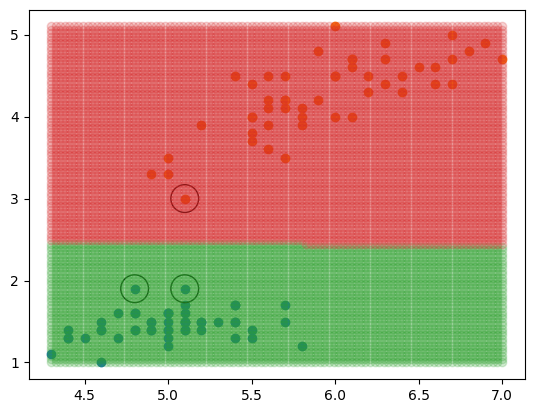

In [128]:
iris = sns.load_dataset('iris')
print(iris.head())

data = iris[['sepal_length', 'petal_length', 'species']]
data_df = data[(data['species'] == 'setosa') | (data['species'] == 'versicolor')]

X = data_df[['sepal_length', 'petal_length']]
y = data_df['species']

data_df_setosa = data_df[data_df['species'] == 'setosa']
data_df_versicolor = data_df[data_df['species'] == 'versicolor']

plt.scatter(data_df_setosa['sepal_length'], data_df_setosa['petal_length'])
plt.scatter(data_df_versicolor['sepal_length'], data_df_versicolor['petal_length'])

model = SVC(kernel='linear', C=10000)
model.fit(X, y)

print(model.support_vectors_)

plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=400, facecolor='none', edgecolor='black')

x1_p = np.linspace(min(data_df['sepal_length']), max(data_df['sepal_length']), 100)
x2_p = np.linspace(min(data_df['petal_length']), max(data_df['petal_length']), 100)

X1_p, X2_p = np.meshgrid(x1_p, x2_p)

X_p = pd.DataFrame(np.vstack([X1_p.ravel(), X2_p.ravel()]).T, columns=['sepal_length', 'petal_length'])

y_p = model.predict(X_p)

X_p['species'] = y_p

X_p_setosa = X_p[X_p['species'] == 'setosa']
X_p_versicolor = X_p[X_p['species'] == 'versicolor']

plt.scatter(X_p_setosa['sepal_length'], X_p_setosa['petal_length'], alpha=0.2)
plt.scatter(X_p_versicolor['sepal_length'], X_p_versicolor['petal_length'], alpha=0.2)

В случае, если данные перекрываются, то идеальной границы не существует. У модели существует гиперпараметр, который определяет "размытие" отступа

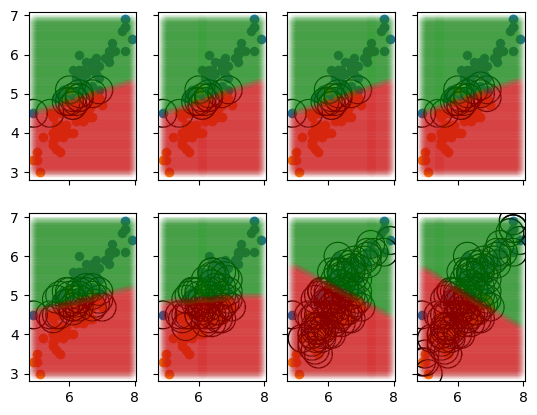

In [129]:
data = iris[['sepal_length', 'petal_length', 'species']]
data_df = data[(data['species'] == 'virginica') | (data['species'] == 'versicolor')]

X = data_df[['sepal_length', 'petal_length']]
y = data_df['species']

data_df_virginica = data_df[data_df['species'] == 'virginica']
data_df_versicolor = data_df[data_df['species'] == 'versicolor']

c_value = [[10000, 1000, 100, 10], [1, 0.1, 0.01, 0.001]]

fig, ax = plt.subplots(2, 4, sharex='col', sharey='row')

for i in range(2):
    for j in range(4):
        ax[i, j].scatter(data_df_virginica['sepal_length'], data_df_virginica['petal_length'])
        ax[i, j].scatter(data_df_versicolor['sepal_length'], data_df_versicolor['petal_length'])

        # Если С большое, то отступ задается "жестко". Чем меньше С, тем отступ становится более "размытым"

        model = SVC(kernel='linear', C=c_value[i][j])
        model.fit(X, y)

        """ print(model.support_vectors_) """

        ax[i, j].scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=400, facecolor='none', edgecolor='black')

        x1_p = np.linspace(min(data_df['sepal_length']), max(data_df['sepal_length']), 100)
        x2_p = np.linspace(min(data_df['petal_length']), max(data_df['petal_length']), 100)

        X1_p, X2_p = np.meshgrid(x1_p, x2_p)

        X_p = pd.DataFrame(np.vstack([X1_p.ravel(), X2_p.ravel()]).T, columns=['sepal_length', 'petal_length'])

        y_p = model.predict(X_p)

        X_p['species'] = y_p

        X_p_virginica = X_p[X_p['species'] == 'virginica']
        X_p_versicolor = X_p[X_p['species'] == 'versicolor']

        ax[i, j].scatter(X_p_virginica['sepal_length'], X_p_virginica['petal_length'], alpha=0.025)
        ax[i, j].scatter(X_p_versicolor['sepal_length'], X_p_versicolor['petal_length'], alpha=0.025)

Плюсы

- Зависимость от небольшого числа опорных векторов -> компактность модели
- После обучения предсказания проходят очень быстро
- На работу метода влияют только точки, находящиеся возле отступов, поэтому эти методы подходят для многомерных данных

Минусы

- При большом количестве обучающих образцов могут быть значительные затраты
- Большая зависимость от размытости С. Поиск может привести к большим вычислительным затратам
- У результатов отсутствует вероятностная интерпретация 

Деревья решений и случайные леса (СЛ)

СЛ - непараметрический алгоритм

СЛ - пример ансамблиевого метода, основанного на агрегации результатов множества простых моделей

В реализациях дерева принятия решений в машинном обучении вопросы ведут к разделению данных по осям, т.е. каждый узел разбивает данные на две группы по одному из признаков

   0
0  1
1  1
2  1
3  1
4  1


C:\Users\n1luh\AppData\Local\Temp\ipykernel_21040\1473426408.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['species'] = species_int_df


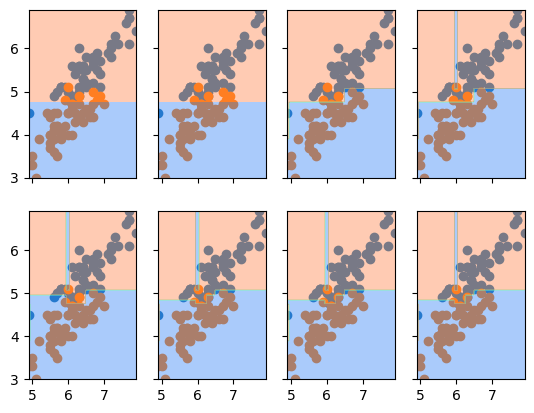

In [130]:
iris = sns.load_dataset('iris')

species_int = []
for r in iris.values:
    if r[4] == 'setosa':
        species_int.append(1)
    elif r[4] == 'versicolor':
        species_int.append(2)
    elif r[4] == 'virginica':
        species_int.append(3)

species_int_df = pd.DataFrame(species_int)
print(species_int_df.head())

data = iris[['sepal_length', 'petal_length']]
data['species'] = species_int_df
data_df = data[(data['species'] == 3) | (data['species'] == 2)]

X = data_df[['sepal_length', 'petal_length']]
y = data_df['species']

data_df_setosa = data_df[data_df['species'] == 3]
data_df_versicolor = data_df[data_df['species'] == 2]

max_steps = [[1, 2, 3, 4], [5, 6, 7, 8]]

fig, ax = plt.subplots(2, 4, sharex='col', sharey='row')

for i in range(2):
    for j in range(4):
        ax[i, j].scatter(data_df_setosa['sepal_length'], data_df_setosa['petal_length'])
        ax[i, j].scatter(data_df_versicolor['sepal_length'], data_df_versicolor['petal_length'])

        model = DecisionTreeClassifier(max_depth=max_steps[i][j])
        model.fit(X, y)

        x1_p = np.linspace(min(data_df['sepal_length']), max(data_df['sepal_length']), 100)
        x2_p = np.linspace(min(data_df['petal_length']), max(data_df['petal_length']), 100)

        X1_p, X2_p = np.meshgrid(x1_p, x2_p)

        X_p = pd.DataFrame(np.vstack([X1_p.ravel(), X2_p.ravel()]).T, columns=['sepal_length', 'petal_length'])

        y_p = model.predict(X_p)

        ax[i, j].contourf(X1_p, X2_p, y_p.reshape(X1_p.shape), alpha=0.4, levels=2, cmap='rainbow', zorder=1)